# Guide to create `FilterSet`
- Can be initialised using 3 approches:
    1. `list_pivot_wavelengths`: A list of pivot wavelengths with appropriate units
    2. `list_filter_names`: A list of standard filter IDs
    3. `file_list`: A list of local files to read the filter transmission

In [1]:
from astropy import units as u
import numpy as np
import sed_analysis_tools as st

## 1. Creating infinitesimally narrow bands - RECOMMENDED
- This is 1000 times faster than providing filter transmission cirves, which leads to slower processing due to on-the-fly synthetic photometric calculations 

[ 1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000. 10000.] Angstrom


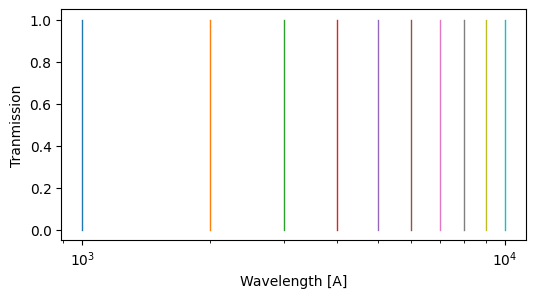

In [2]:
filter_set_1 = st.FilterSet(list_pivot_wavelengths=np.linspace(1000, 10000, 10) * u.AA)
filter_set_1.plot_all_filters()
print(filter_set_1.list_pivot_wavelengths)

[  1481.   1541.   1607.   2303.   4357.   5035.   5366.   5822.   7619.
   8101.   8578.  12350.  16620.  21589.  33525.  46027. 115608.] Angstrom


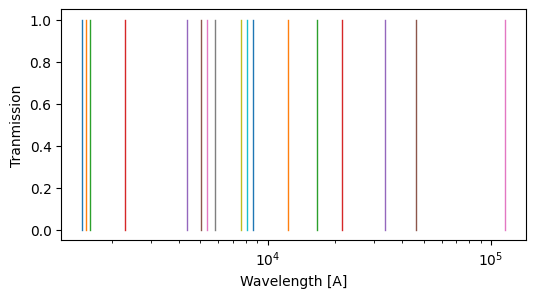

In [3]:
list_pivot_wavelengths = np.array([1481,1541,1607,2303,4357,5035,5366,
                                   5822,7619,8101,8578,12350,16620,21589,
                                   33525,46027,115608])* u.AA
filter_set_2 = st.FilterSet(list_pivot_wavelengths=list_pivot_wavelengths)
filter_set_2.plot_all_filters()
print(filter_set_2.list_pivot_wavelengths)

## 2. Creating `FilterSet` based on filter names
- Names as given in SVO filter profile survice: http://svo2.cab.inta-csic.es/theory/fps/
- The required transmission curves will be downloaded automatically
- If `dir_filter_transmission` is provided, it will first look in the folder before downloading files

[  1481.   1541.   1607.   2303.   4357.   5035.   5366.   5822.   7619.
   8101.   8578.  12350.  16620.  21589.  33525.  46027. 115608.] Angstrom


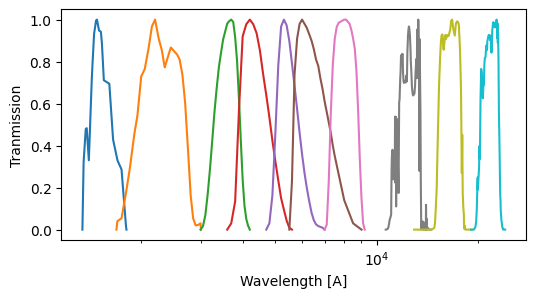

In [4]:
list_filter_names = [
    "GALEX/GALEX.FUV",
    "GALEX/GALEX.NUV",
    "Generic/Bessell.U",
    "Generic/Bessell.V",
    "Generic/Bessell.B",
    "Generic/Bessell.R",
    "Generic/Bessell.I",
    "2MASS/2MASS.H",
    "2MASS/2MASS.J",
    "2MASS/2MASS.Ks",
]
filter_set_3 = st.FilterSet(list_filter_names=list_filter_names)
filter_set_3.plot_all_filters()
print(filter_set_2.list_pivot_wavelengths)

## 3. Reading transmission curves from ascii files
- Provide `file_list' with two columns without any header
- wavelength in Angstrom | Filter transmission (cm2 or normalized response both work)

<Quantity [ 1528.08101829,  2271.07094752,  3584.77696584,  4371.07124285,
            5477.69729923,  6498.08832827,  8020.14185526, 12358.08945656,
           16457.50389384, 21603.09487719] Angstrom>

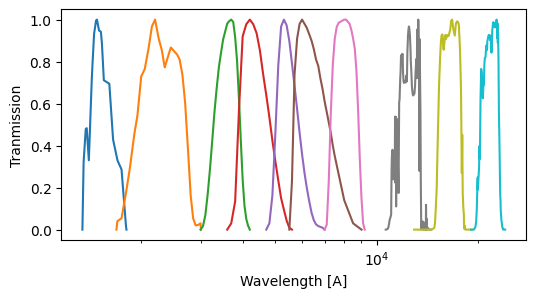

In [5]:
file_list = [
    "data/filter_transmission/2MASS_2MASS.H.dat",
    "data/filter_transmission/2MASS_2MASS.J.dat",
    "data/filter_transmission/2MASS_2MASS.Ks.dat",
    "data/filter_transmission/GALEX_GALEX.FUV.dat",
    "data/filter_transmission/GALEX_GALEX.NUV.dat",
    "data/filter_transmission/Generic_Bessell.B.dat",
    "data/filter_transmission/Generic_Bessell.I.dat",
    "data/filter_transmission/Generic_Bessell.R.dat",
    "data/filter_transmission/Generic_Bessell.U.dat",
    "data/filter_transmission/Generic_Bessell.V.dat",
]

filter_set_4 = st.FilterSet(list_files=file_list)
filter_set_4.plot_all_filters()
filter_set_4.list_pivot_wavelengths